In [1]:
import pandas as pd

In [2]:
!dir

 Volume in drive F is New Volume
 Volume Serial Number is 4CCA-3E1B

 Directory of F:\temp\Data\VA!\5180data

2021-03-06  08:23 PM    <DIR>          .
2021-03-06  08:23 PM    <DIR>          ..
2021-03-06  06:00 PM    <DIR>          .ipynb_checkpoints
2021-02-28  04:12 PM         2,028,105 dev.data
2021-03-06  08:15 PM           893,031 improved_va_model1.ipynb
2021-03-06  03:30 PM    <DIR>          saved_folder
2021-03-06  04:10 PM    <DIR>          source_folder
2021-03-06  01:03 PM            11,802 Temp_Bert.ipynb
2015-01-14  07:23 PM           406,678 test.data
2015-01-14  07:23 PM            12,327 test.label
2021-02-28  04:54 PM         5,851,729 train.data
2021-03-06  12:56 PM               585 VA_assignment Bert.ipynb
2021-03-06  05:41 PM           216,097 VA_assignment1_Baseline.ipynb
2021-03-06  08:23 PM           646,256 va_model2.ipynb
               9 File(s)     10,066,610 bytes
               5 Dir(s)  111,426,166,784 bytes free


In [3]:
Test = pd.read_csv('test.data', header=None, sep = '\t')
Dev = pd.read_csv('dev.data', header=None, sep = '\t')
Train = pd.read_csv('train.data', header=None, sep = '\t')

In [4]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13064 entries, 0 to 13063
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       13064 non-null  object
 1   1       13063 non-null  object
 2   2       13063 non-null  object
 3   3       13063 non-null  object
 4   4       13063 non-null  object
 5   5       13063 non-null  object
 6   6       13063 non-null  object
dtypes: object(7)
memory usage: 714.6+ KB


In [5]:
Column_name = ['ID', 'Topic_name', 'S1', 'S2', 'Label', 'S1Tag', 'S2Tag']

In [6]:
Train.columns = Column_name
Test.columns = Column_name
Dev.columns = Column_name

In [7]:
Train.tail()

,ID,Topic_name,S1,S2,Label,S1Tag,S2Tag
13059,1891,iPhone 5,It fits the larger iPhone 5,Should I get the iPhone 5 or an Android,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Should/O/UH/O/O I/O/PRP/B-NP/O get/O/VBP/B-VP/...
13060,1891,iPhone 5,It fits the larger iPhone 5,Somebody bring me an iPhone 5 charger to my work,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Somebody/O/NN/B-NP/O bring/O/VB/B-VP/B-EVENT m...
13061,1891,iPhone 5,It fits the larger iPhone 5,Unlocked iPhone 5 300 hit me,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Unlocked/O/NNP/B-NP/O iPhone/O/NNP/I-NP/O 5/O/...
13062,1891,iPhone 5,It fits the larger iPhone 5,if you have an iPhone 5 guess what WE FINALLY ...,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,if/O/IN/B-SBAR/O you/O/PRP/B-NP/O have/O/VBP/B...
13063,=,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Train = Train.drop(Train.index[-1])

In [9]:
Train.tail()

,ID,Topic_name,S1,S2,Label,S1Tag,S2Tag
13058,1891,iPhone 5,It fits the larger iPhone 5,My brother thirsty for this iPhone 5 so ill gu...,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,My/O/PRP$/B-NP/O brother/O/NN/I-NP/O thirsty/O...
13059,1891,iPhone 5,It fits the larger iPhone 5,Should I get the iPhone 5 or an Android,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Should/O/UH/O/O I/O/PRP/B-NP/O get/O/VBP/B-VP/...
13060,1891,iPhone 5,It fits the larger iPhone 5,Somebody bring me an iPhone 5 charger to my work,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Somebody/O/NN/B-NP/O bring/O/VB/B-VP/B-EVENT m...
13061,1891,iPhone 5,It fits the larger iPhone 5,Unlocked iPhone 5 300 hit me,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Unlocked/O/NNP/B-NP/O iPhone/O/NNP/I-NP/O 5/O/...
13062,1891,iPhone 5,It fits the larger iPhone 5,if you have an iPhone 5 guess what WE FINALLY ...,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,if/O/IN/B-SBAR/O you/O/PRP/B-NP/O have/O/VBP/B...


In [10]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13063 entries, 0 to 13062
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          13063 non-null  object
 1   Topic_name  13063 non-null  object
 2   S1          13063 non-null  object
 3   S2          13063 non-null  object
 4   Label       13063 non-null  object
 5   S1Tag       13063 non-null  object
 6   S2Tag       13063 non-null  object
dtypes: object(7)
memory usage: 816.4+ KB


In [11]:
Dev.head()

,ID,Topic_name,S1,S2,Label,S1Tag,S2Tag
0,17,A Walk To Remember,A Walk to Remember is the definition of true love,A Walk to Remember is on and Im in town and Im...,"(1, 4)",A/O/DT/B-NP/O Walk/O/NN/I-NP/O to/O/TO/B-VP/O ...,A/O/DT/B-NP/O Walk/O/NN/I-NP/O to/O/TO/B-VP/O ...
1,17,A Walk To Remember,A Walk to Remember is the definition of true love,A Walk to Remember is the cutest thing,"(3, 2)",A/O/DT/B-NP/O Walk/O/NN/I-NP/O to/O/TO/B-VP/O ...,A/O/DT/B-NP/O Walk/O/NN/I-NP/O to/O/TO/B-VP/O ...
2,17,A Walk To Remember,A Walk to Remember is the definition of true love,A walk to remember is on ABC family youre welcome,"(1, 4)",A/O/DT/B-NP/O Walk/O/NN/I-NP/O to/O/TO/B-VP/O ...,A/O/DT/B-NP/O walk/O/NN/I-NP/O to/O/TO/B-VP/O ...
3,17,A Walk To Remember,A Walk to Remember is the definition of true love,A walk to remember is so amazing and inspiring,"(3, 2)",A/O/DT/B-NP/O Walk/O/NN/I-NP/O to/O/TO/B-VP/O ...,A/O/DT/B-NP/O walk/O/NN/I-NP/O to/O/TO/B-VP/O ...
4,17,A Walk To Remember,A Walk to Remember is the definition of true love,BUT GUYS ITS ON MY FAVE PART OF A WALK TO REME...,"(1, 4)",A/O/DT/B-NP/O Walk/O/NN/I-NP/O to/O/TO/B-VP/O ...,BUT/O/CC/O/O GUYS/O/VBP/B-VP/B-EVENT ITS/O/PRP...


In [12]:
Dev.tail()

,ID,Topic_name,S1,S2,Label,S1Tag,S2Tag
4722,1902,iTunes,My first podcast drops on iTunes,No wonder I spend so much on iTunes,"(0, 5)",My/O/PRP$/B-NP/O first/O/JJ/I-NP/O podcast/O/N...,No/O/DT/B-NP/O wonder/O/NN/I-NP/O I/O/PRP/B-NP...
4723,1902,iTunes,My first podcast drops on iTunes,Our Dead and Gone EP is now on iTunes,"(1, 4)",My/O/PRP$/B-NP/O first/O/JJ/I-NP/O podcast/O/N...,Our/O/PRP/B-NP/O Dead/O/JJ/I-NP/O and/O/CC/I-N...
4724,1902,iTunes,My first podcast drops on iTunes,amslingshots is 7 on the iTunes charts,"(0, 5)",My/O/PRP$/B-NP/O first/O/JJ/I-NP/O podcast/O/N...,amslingshots/O/NNP/B-NP/O is/O/VBZ/B-VP/O 7/O/...
4725,1902,iTunes,My first podcast drops on iTunes,iTunes deleted my voice memos,"(0, 5)",My/O/PRP$/B-NP/O first/O/JJ/I-NP/O podcast/O/N...,iTunes/B-company/NNP/B-NP/O deleted/O/VBD/B-VP...
4726,1902,iTunes,My first podcast drops on iTunes,the new cd from RRBChoir is now available on i...,"(0, 5)",My/O/PRP$/B-NP/O first/O/JJ/I-NP/O podcast/O/N...,the/O/DT/B-NP/O new/O/JJ/I-NP/O cd/O/NN/I-NP/O...


In [13]:
Test.head()

,ID,Topic_name,S1,S2,Label,S1Tag,S2Tag
0,51,8 Mile,All the home alones watching 8 mile,8 mile is on thats my movie,3,All/O/DT/B-NP/O the/O/DT/I-NP/O home/O/NN/I-NP...,8/O/NN/B-NP/O mile/O/NN/I-NP/O is/O/VBZ/B-VP/O...
1,51,8 Mile,All the home alones watching 8 mile,The last rap battle in 8 Mile nevr gets old ahah,2,All/O/DT/B-NP/O the/O/DT/I-NP/O home/O/NN/I-NP...,The/O/DT/B-NP/O last/O/JJ/I-NP/O rap/O/NN/I-NP...
2,51,8 Mile,All the home alones watching 8 mile,The rap battle at the end of 8 mile gets me so...,2,All/O/DT/B-NP/O the/O/DT/I-NP/O home/O/NN/I-NP...,The/O/DT/B-NP/O rap/O/NN/I-NP/O battle/O/NN/I-...
3,51,8 Mile,The Ending to 8 Mile is my fav part of the who...,Rabbit on 8 mile out of place but determined t...,1,The/O/DT/B-NP/O Ending/O/VBG/I-NP/B-EVENT to/O...,Rabbit/O/NNP/B-NP/O on/O/IN/B-PP/O 8/O/CD/B-NP...
4,51,8 Mile,The Ending to 8 Mile is my fav part of the who...,See 8 Mile is always on but it s the tv versio...,1,The/O/DT/B-NP/O Ending/O/VBG/I-NP/B-EVENT to/O...,See/O/VB/B-VP/O 8/O/CD/B-NP/O Mile/O/NNP/I-NP/...


In [14]:
Test.tail()

,ID,Topic_name,S1,S2,Label,S1Tag,S2Tag
967,5273,Z-Bo,Ball dont lie ZBo,If Zbo didnt make that shot,2,Ball/O/NN/B-NP/O dont/O/MD/B-VP/O lie/O/VB/I-V...,If/O/IN/B-SBAR/O Zbo/O/NNP/B-NP/O didnt/O/MD/B...
968,5273,Z-Bo,The Spurs own ZBo,ZBo is a fucking scrub,1,The/B-sportsteam/DT/B-NP/O Spurs/I-sportsteam/...,ZBo/B-person/NNP/B-NP/O is/O/VBZ/B-VP/O a/O/DT...
969,5273,Z-Bo,The Spurs own ZBo,ZBo hit these free throws bruh,1,The/B-sportsteam/DT/B-NP/O Spurs/I-sportsteam/...,ZBo/O/MD/B-VP/O hit/O/VB/I-VP/B-EVENT these/O/...
970,5273,Z-Bo,The Spurs own ZBo,I told you feed Zbo,1,The/B-sportsteam/DT/B-NP/O Spurs/I-sportsteam/...,I/O/PRP/B-NP/O told/O/VBD/B-VP/B-EVENT you/O/P...
971,5273,Z-Bo,The Spurs own ZBo,Memphis is still my team and ZBo is still my dude,1,The/B-sportsteam/DT/B-NP/O Spurs/I-sportsteam/...,Memphis/B-geo-loc/NNP/B-NP/O is/O/VBZ/B-VP/O s...


In [15]:
Test['Label'][0]

3

In [16]:
from tqdm import tqdm
def Define_Lable(df, lable_name):
    final_label = []
    dicard_line = []
    for i in tqdm(range(len(df))):
        if len(str(df[lable_name][i])) != 1:
            score1 = df[lable_name][i][1]
            score2 = df[lable_name][i][4]

            if int(score1) > 2:
                final_label.append(1)
            elif int(score1) == 2:
                dicard_line.append(i)
            else:
                final_label.append(0)
        else:
            score = int(df[lable_name][i])
            if score > 3:
                final_label.append(1)
            elif score == 3:
                dicard_line.append(i)
            else:
                final_label.append(0)
            
    final_df = df.drop(df.index[dicard_line])
    final_df[lable_name] = final_label
    return final_df

In [17]:
Train_final = Define_Lable(Train, 'Label')
Dev_final = Define_Lable(Dev, 'Label')
Test_final = Define_Lable(Test, 'Label')

100%|█████████████████████████████████████████████████████████████████████████████| 972/972 [00:00<00:00, 88604.35it/s]


In [18]:
# data preprocessing class
import re
from tqdm import tqdm
import emoji

class Word_Preprocessing():
    def eliminate_url(self,df,target):
        print('Start eliminate url: : )')
        df_temp = df
        target_column_name = target
        text = df_temp[target_column_name]
        for i in tqdm(text):
            urls = re.findall(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', i)
            for i in urls:
                df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ""))
        return df_temp
    
    def eliminate_username(self,df,target):
        print('Start eliminate username: : )')
        df_temp = df
        target_column_name = target
        for i in tqdm(df_temp[target_column_name]):
            user_name = re.findall(r'@\w*', i)
            for i in user_name:
                df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ""))
        return df_temp
     
    def eliminate_hashtag(self, df, target):
        df_temp = df
        target_column_name = target
        for i in tqdm(df_temp[target_column_name]):
            user_name = re.findall(r'#\w*', i)
            for i in user_name:
                df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ""))
        return df_temp
    
    def convert_abbreviation(self, df, target):
        df_temp = df
        target_column_name = target
        am = "'m"
        are = "'re"
        have = "'ve"
        not_ = "n't"
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(am, " am"))
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(are, "  are"))
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(have, " have"))
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(not_, " not"))
        return df_temp
        
    def lowercase_all(self, df, target):
        df_tmp = df
        tmp_str = [str.lower(i) for i in df[target]] 
        df_tmp[target] = tmp_str
        return df_tmp 
        
        
    def eliminate_symbol(self,df,target):
        print('Start eliminate symbol: : )')
        df_temp = df
        target_column_name = target
        symbol_list = [',',"'",'!','@','$','%','^','&','*','(',')','-','+','?','>','<','=','.',':',';','  ','  ','   ','    ','      ','      ','  ']
        for i in tqdm(symbol_list):
            df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ' '))
        return df_temp
    
    def process_all(self, df,target):
        df_temp = df
        target_column_name = target
        df_fresh = self.convert_abbreviation(df_temp,target_column_name)
        df_remove_url = self.eliminate_url(df_fresh,target_column_name)
        df_eliminate_hashtag = self.eliminate_hashtag(df_remove_url, target_column_name)
        df_remove_username = self.eliminate_username(df_eliminate_hashtag, target_column_name)
        df_remove_symbol = self.eliminate_symbol(df_remove_username, target_column_name)
        df_final = self.lowercase_all(df_remove_symbol, target_column_name)
        print("finished!!")
        return df_final

In [19]:
word_preprocesser = Word_Preprocessing()

In [20]:
tmp_Train = word_preprocesser.process_all(Train_final, 'S1')
Train_cleaned  = word_preprocesser.process_all(tmp_Train, 'S2')
tmp_Dev = word_preprocesser.process_all(Dev_final, 'S1')
Dev_cleaned = word_preprocesser.process_all(tmp_Dev, 'S2')
tmp_Test = word_preprocesser.process_all(Test_final, 'S1')
Test_cleaned = word_preprocesser.process_all(tmp_Test, 'S2')

  0%|                                                                                        | 0/11530 [00:00<?, ?it/s]

Start eliminate url: : )
Start eliminate username: : )
Start eliminate symbol: : )
finished!!
Start eliminate url: : )
Start eliminate username: : )


  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Start eliminate symbol: : )
finished!!
Start eliminate url: : )
Start eliminate username: : )
Start eliminate symbol: : )
finished!!
Start eliminate url: : )
Start eliminate username: : )
Start eliminate symbol: : )


100%|████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 2256.13it/s]

finished!!
Start eliminate url: : )
Start eliminate username: : )
Start eliminate symbol: : )
finished!!
Start eliminate url: : )
Start eliminate username: : )
Start eliminate symbol: : )
finished!!


In [21]:
Train_cleaned

,ID,Topic_name,S1,S2,Label,S1Tag,S2Tag
0,4,1st QB,ej manuel the 1st qb to go in this draft,but my bro from the 757 ej manuel is the 1st q...,1,EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,But/O/CC/O/O my/O/PRP$/B-NP/O bro/O/NN/I-NP/O ...
1,4,1st QB,ej manuel the 1st qb to go in this draft,can believe ej manuel went as the 1st qb in th...,1,EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,Can/O/MD/B-VP/O believe/O/VB/I-VP/B-EVENT EJ/B...
2,4,1st QB,ej manuel the 1st qb to go in this draft,ej manuel is the 1st qb what,1,EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,EJ/B-person/NNP/B-NP/O MANUEL/I-person/NNP/I-N...
4,4,1st QB,ej manuel the 1st qb to go in this draft,manuel is the 1st qb to get drafted,1,EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,Manuel/B-person/NNP/B-NP/O is/O/VBZ/B-VP/O the...
5,4,1st QB,ej manuel the 1st qb to go in this draft,my boy ej manuel being the 1st qb picked,1,EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,My/O/PRP$/B-NP/O boy/O/NN/I-NP/O EJ/B-person/N...
...,...,...,...,...,...,...,...
13058,1891,iPhone 5,it fits the larger iphone 5,my brother thirsty for this iphone 5 so ill gu...,0,It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,My/O/PRP$/B-NP/O brother/O/NN/I-NP/O thirsty/O...
13059,1891,iPhone 5,it fits the larger iphone 5,should i get the iphone 5 or an android,0,It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Should/O/UH/O/O I/O/PRP/B-NP/O get/O/VBP/B-VP/...
13060,1891,iPhone 5,it fits the larger iphone 5,somebody bring me an iphone 5 charger to my work,0,It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Somebody/O/NN/B-NP/O bring/O/VB/B-VP/B-EVENT m...
13061,1891,iPhone 5,it fits the larger iphone 5,unlocked iphone 5 300 hit me,0,It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Unlocked/O/NNP/B-NP/O iPhone/O/NNP/I-NP/O 5/O/...


In [22]:
import Levenshtein

In [23]:
Train_final = Train_cleaned.reset_index()
Dev_final = Dev_cleaned.reset_index()
Test_final = Test_cleaned.reset_index()

## Cosine distance
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def cosine_sim_vectors(v1, v2):
    v1 = v1.reshape(1,-1)
    v2 = v2.reshape(1,-1)
    return cosine_similarity(v1, v2)[0][0]


def calculate_Cosi(df):
    Cos_score = []
    for index in tqdm(range(len(df))):
        s1 = df['S1'][index]
        s2 = df['S2'][index]
        s_all = [s1, s2]
        vectorizer = CountVectorizer().fit_transform(s_all)
        vectors = vectorizer.toarray()
        csim = cosine_similarity(vectors)
        Cos_score.append(cosine_sim_vectors(vectors[0], vectors[1]))
    return Cos_score

## Type distance
https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a

In [25]:
def calculate_Lev(df):
    length_all = []
    for index in tqdm(range(len(df))):
        s1 = df['S1'][index]
        s2 = df['S2'][index]
        distance = Levenshtein.distance(s1,s2)
        length_all.append(distance)
    return length_all

In [26]:
Lev_train = calculate_Lev(Train_final)
Lev_dev = calculate_Lev(Dev_final)
Lev_test = calculate_Lev(Test_final)

100%|█████████████████████████████████████████████████████████████████████████████| 838/838 [00:00<00:00, 70020.65it/s]


In [27]:
Cos_train = calculate_Cosi(Train_final)
Cos_dev = calculate_Cosi(Dev_final)
Cos_test = calculate_Cosi(Test_final)

100%|██████████████████████████████████████████████████████████████████████████████| 838/838 [00:00<00:00, 1650.77it/s]


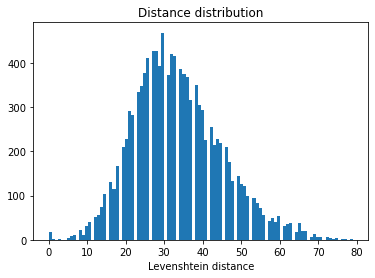

In [28]:
import matplotlib.pyplot as plt
plt.hist(Lev_train, bins=100)
plt.xlabel('Levenshtein distance')
plt.title('Distance distribution')
plt.show()

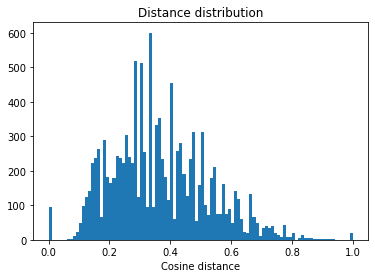

In [29]:
plt.hist(Cos_train, bins=100)
plt.xlabel('Cosine distance')
plt.title('Distance distribution')
plt.show()

In [41]:
Train_check = {'Cos_dis':Cos_train,
                'Lev_dis':Lev_train}
Test_check = {'Cos_dis':Cos_test,
                'Lev_dis':Lev_test}
Dev_check = {'Cos_dis':Cos_dev,
                'Lev_dis':Lev_dev}
Train_dis = pd.DataFrame(Train_check)
Test_dis = pd.DataFrame(Test_check)
Dev_dis = pd.DataFrame(Dev_check)

In [31]:
from sklearn import tree
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score, precision_score,recall_score, f1_score
def Basic_DT_By_Sample(Train_x, test_x, Train_label_x, Test_Lable_x):
    acc_list = []
    pre_list = []
    rec_list = []
    min_sam = range(1,30)
    for i in min_sam:
        Tree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=i)
        Tree.fit(Train_x, Train_label_x)
        Prediction = Tree.predict(test_x)
        recall = recall_score(Test_Lable_x, Prediction)
        precision = precision_score(Test_Lable_x, Prediction)
        accuray = accuracy_score(Test_Lable_x, Prediction)
        
        acc_list.append(accuray)
        pre_list.append(precision)
        rec_list.append(recall)
        confusion_matrix1 = confusion_matrix(Test_Lable_x, Prediction, labels=[0, 1])
        print('min_sam_num:',i,"Precision:", precision, "Recall:", recall, 'Accuracy:', accuray)
    return acc_list, pre_list, rec_list



In [32]:
acc_list, pre_list, rec_list = Basic_DT_By_Sample(Train_dis, Test_dis, Train_final['Label'], Test_final['Label'])

min_sam_num: 1 Precision: 0.5244755244755245 Recall: 0.42857142857142855 Accuracy: 0.7995226730310262
min_sam_num: 2 Precision: 0.5217391304347826 Recall: 0.4114285714285714 Accuracy: 0.7983293556085919
min_sam_num: 3 Precision: 0.5486111111111112 Recall: 0.4514285714285714 Accuracy: 0.8078758949880668
min_sam_num: 4 Precision: 0.5522388059701493 Recall: 0.4228571428571429 Accuracy: 0.8078758949880668
min_sam_num: 5 Precision: 0.5436241610738255 Recall: 0.46285714285714286 Accuracy: 0.8066825775656324
min_sam_num: 6 Precision: 0.5436241610738255 Recall: 0.46285714285714286 Accuracy: 0.8066825775656324
min_sam_num: 7 Precision: 0.5490196078431373 Recall: 0.48 Accuracy: 0.8090692124105012
min_sam_num: 8 Precision: 0.5945945945945946 Recall: 0.5028571428571429 Accuracy: 0.8245823389021479
min_sam_num: 9 Precision: 0.5973154362416108 Recall: 0.5085714285714286 Accuracy: 0.8257756563245824
min_sam_num: 10 Precision: 0.5960264900662252 Recall: 0.5142857142857142 Accuracy: 0.8257756563245824


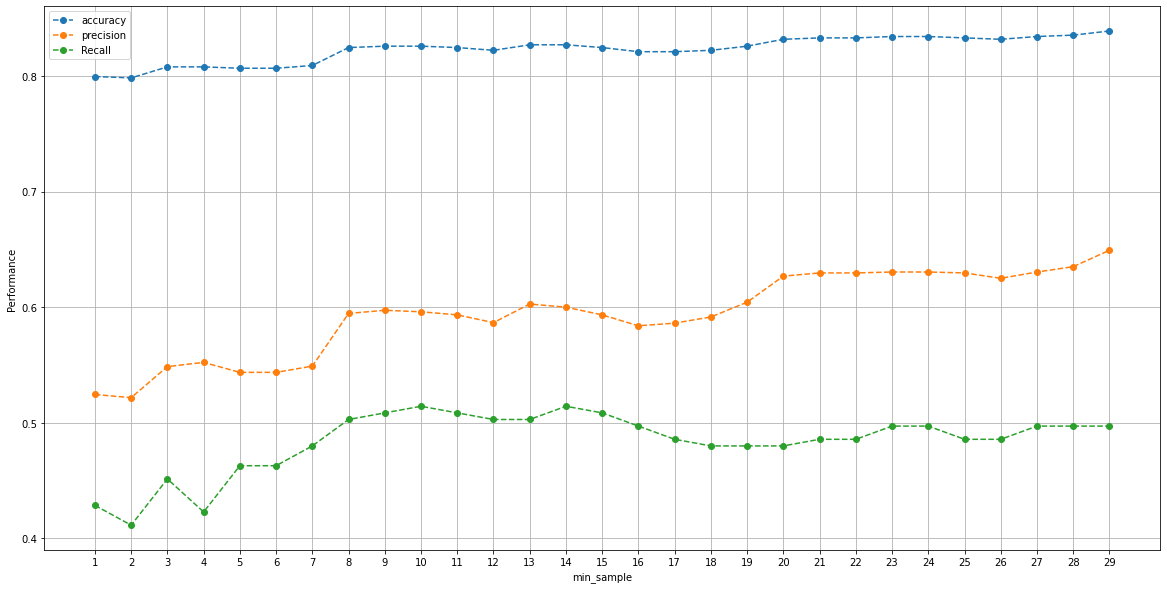

In [33]:
plt.figure(figsize=(20,10))
plt.grid(True)
min_sam = range(1,30)
plt.plot(min_sam,acc_list,label='accuracy',marker='o', linestyle='--',)
plt.plot(min_sam,pre_list,label = 'precision',marker='o', linestyle='--',)
plt.plot(min_sam, rec_list,label='Recall',marker='o', linestyle='--',)
plt.xlabel('min_sample')
plt.ylabel('Performance')
plt.xticks(min_sam, min_sam)
plt.legend()
plt.show()

In [34]:
print('minimum sample for accuracy:',min_sam[acc_list.index(max(acc_list))],'accuracy:',max(acc_list))
print('minimum sample for precision:',min_sam[pre_list.index(max(pre_list))],'precision:',max(pre_list))
print('minimum sample for recall:',min_sam[rec_list.index(max(rec_list))],'recall:',max(rec_list))

minimum sample for accuracy: 29 accuracy: 0.8389021479713604
minimum sample for precision: 29 precision: 0.6492537313432836
minimum sample for recall: 10 recall: 0.5142857142857142


In [35]:
def Basic_DT_By_Depth(Train_x, test_x, Train_label_x, Test_Lable_x):
    acc_list = []
    pre_list = []
    rec_list = []
    depth_list = range(1,30)
    for i in depth_list:
        Tree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=19, max_depth=i)
        Tree.fit(Train_x, Train_label_x)
        Prediction = Tree.predict(test_x)
        recall = recall_score(Test_Lable_x, Prediction)
        precision = precision_score(Test_Lable_x, Prediction)
        accuray = accuracy_score(Test_Lable_x, Prediction)
        acc_list.append(accuray)
        pre_list.append(precision)
        rec_list.append(recall)
        confusion_matrix1 = confusion_matrix(Test_Lable_x, Prediction, labels=[0, 1])
        print('max depth:',i,"Precision:", precision, "Recall:", recall, 'Accuracy:', accuray)
    return acc_list, pre_list, rec_list

In [36]:
acc_list1, pre_list1, rec_list1 = Basic_DT_By_Depth(Train_dis, Test_dis, Train_final['Label'], Test_final['Label'])

max depth: 1 Precision: 0.5775401069518716 Recall: 0.6171428571428571 Accuracy: 0.8257756563245824
max depth: 2 Precision: 0.5775401069518716 Recall: 0.6171428571428571 Accuracy: 0.8257756563245824
max depth: 3 Precision: 0.6744186046511628 Recall: 0.49714285714285716 Accuracy: 0.8448687350835322
max depth: 4 Precision: 0.6470588235294118 Recall: 0.5028571428571429 Accuracy: 0.8389021479713604
max depth: 5 Precision: 0.6717557251908397 Recall: 0.5028571428571429 Accuracy: 0.8448687350835322
max depth: 6 Precision: 0.6666666666666666 Recall: 0.5257142857142857 Accuracy: 0.8460620525059666
max depth: 7 Precision: 0.6503496503496503 Recall: 0.5314285714285715 Accuracy: 0.8424821002386634
max depth: 8 Precision: 0.6567164179104478 Recall: 0.5028571428571429 Accuracy: 0.8412887828162291
max depth: 9 Precision: 0.6285714285714286 Recall: 0.5028571428571429 Accuracy: 0.834128878281623
max depth: 10 Precision: 0.6222222222222222 Recall: 0.48 Accuracy: 0.8305489260143198
max depth: 11 Precision

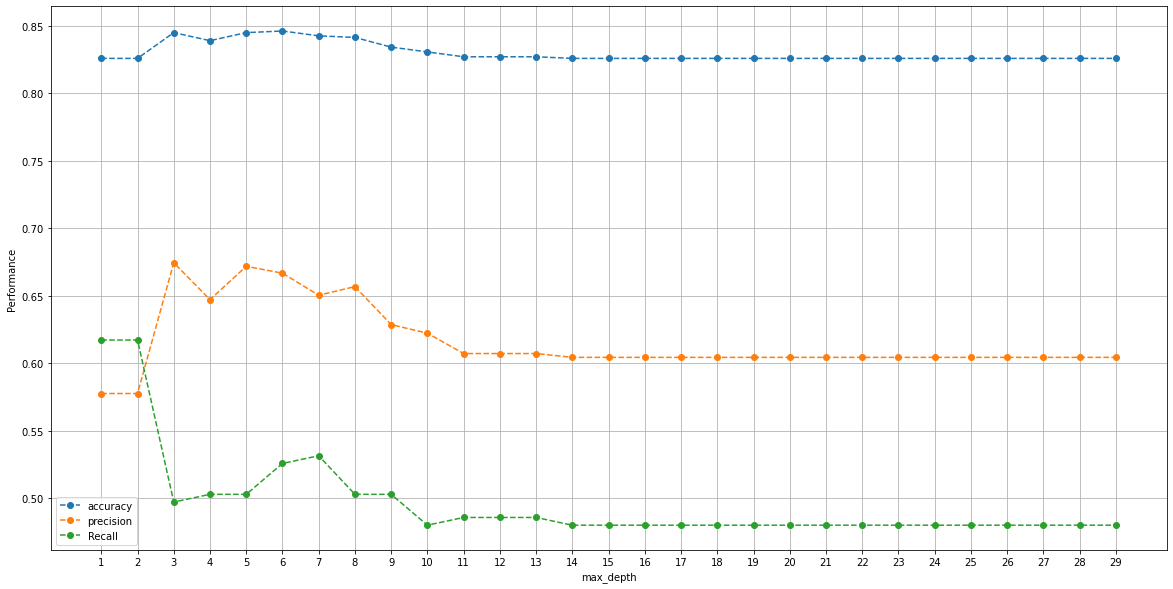

In [37]:
plt.figure(figsize=(20,10))
plt.grid(True)
min_sam = range(1,30)
depth_list = range(1,30)
plt.plot(depth_list,acc_list1,label='accuracy',marker='o', linestyle='--',)
plt.plot(depth_list,pre_list1,label = 'precision',marker='o', linestyle='--',)
plt.plot(depth_list, rec_list1,label='Recall',marker='o', linestyle='--',)
plt.xlabel('max_depth')
plt.ylabel('Performance')
plt.xticks(min_sam, min_sam)
plt.legend()
plt.show()

In [38]:
print('minimum sample for accuracy:',min_sam[acc_list1.index(max(acc_list1))],'accuracy:',max(acc_list1))
print('minimum sample for precision:',min_sam[pre_list1.index(max(pre_list1))],'precision:',max(pre_list1))
print('minimum sample for recall:',min_sam[rec_list1.index(max(rec_list1))],'recall:',max(rec_list1))

minimum sample for accuracy: 6 accuracy: 0.8460620525059666
minimum sample for precision: 3 precision: 0.6744186046511628
minimum sample for recall: 1 recall: 0.6171428571428571


In [39]:
def Final_DT(Train_x, test_x, Train_label_x, Test_Lable_x):
    Tree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=19, max_depth=1)
    Tree.fit(Train_x, Train_label_x)
    Prediction = Tree.predict(test_x)
    recall = recall_score(Test_Lable_x, Prediction)
    precision = precision_score(Test_Lable_x, Prediction)
    accuray = accuracy_score(Test_Lable_x, Prediction)
    f1 = f1_score(Test_Lable_x, Prediction)
    acc_list.append(accuray)
    pre_list.append(precision)
    rec_list.append(recall)
    confusion_matrix1 = confusion_matrix(Test_Lable_x, Prediction, labels=[0, 1])
    print("Precision:", precision, "Recall:", recall, 'Accuracy:', accuray, 'F1 score:', f1)
    print("Confusion matrix")
    print(confusion_matrix1)
    return Tree

In [43]:
Final_DT_model = Final_DT(Train_dis, Dev_dis, Train_final['Label'], Dev_final['Label'])

Precision: 0.6786757546251218 Recall: 0.4741496598639456 Accuracy: 0.7337035248672139 F1 score: 0.5582699239086905
Confusion matrix
[[2342  330]
 [ 773  697]]


In [55]:
Target = ['0','1']

In [60]:
from sklearn.tree import export_text
r = export_text(Final_DT_model, feature_names=list(Train_dis.columns),show_weights= True)
print(r)

|--- Cos_dis <= 0.41
|   |--- weights: [6153.00, 1334.00] class: 0
|--- Cos_dis >  0.41
|   |--- weights: [1381.00, 2662.00] class: 1



In [41]:
Test_final.head()

,index,ID,Topic_name,S1,S2,Label,S1Tag,S2Tag
0,1,51,8 Mile,all the home alones watching 8 mile,the last rap battle in 8 mile nevr gets old ahah,0,All/O/DT/B-NP/O the/O/DT/I-NP/O home/O/NN/I-NP...,The/O/DT/B-NP/O last/O/JJ/I-NP/O rap/O/NN/I-NP...
1,2,51,8 Mile,all the home alones watching 8 mile,the rap battle at the end of 8 mile gets me so...,0,All/O/DT/B-NP/O the/O/DT/I-NP/O home/O/NN/I-NP...,The/O/DT/B-NP/O rap/O/NN/I-NP/O battle/O/NN/I-...
2,3,51,8 Mile,the ending to 8 mile is my fav part of the who...,rabbit on 8 mile out of place but determined t...,0,The/O/DT/B-NP/O Ending/O/VBG/I-NP/B-EVENT to/O...,Rabbit/O/NNP/B-NP/O on/O/IN/B-PP/O 8/O/CD/B-NP...
3,4,51,8 Mile,the ending to 8 mile is my fav part of the who...,see 8 mile is always on but it s the tv versio...,0,The/O/DT/B-NP/O Ending/O/VBG/I-NP/B-EVENT to/O...,See/O/VB/B-VP/O 8/O/CD/B-NP/O Mile/O/NNP/I-NP/...
4,5,51,8 Mile,the ending to 8 mile is my fav part of the who...,those last 3 battles in 8 mile are the shit,1,The/O/DT/B-NP/O Ending/O/VBG/I-NP/B-EVENT to/O...,Those/O/DT/B-NP/O last/O/JJ/I-NP/O 3/O/CD/I-NP...


In [42]:
print("The sample data set are:")
print("Cos/Lev Distance:",(Test_dis['Cos_dis'][0], Test_dis['Lev_dis'][0]), Test_final['S1'][0],' ',Test_final['S2'][0], 'Lable is:',Test_final['Label'][0], "Prediction:", Final_DT_model.predict([list(Test_dis.iloc[0])])[0])
print("Cos/Lev Distance:",(Test_dis['Cos_dis'][20], Test_dis['Lev_dis'][20]), Test_final['S1'][20],' ',Test_final['S2'][20], 'Lable is:',Test_final['Label'][20], "Prediction:", Final_DT_model.predict([list(Test_dis.iloc[20])])[0])

The sample data set are:
Cos/Lev Distance: (0.25819888974716115, 38) all the home alones watching 8 mile   the last rap battle in 8 mile nevr gets old ahah Lable is: 0 Prediction: 0
Cos/Lev Distance: (0.4999999999999999, 22) ok good the end of 8 mile is on   the end of 8 mile makes me so happy Lable is: 1 Prediction: 1
